# Convolutional Neural Networks - MNIST Dataset

Convolutional neural networks have been shown to be very successful in image recognition. A MLP is fully connected by each layer, for an image this can result in a huge ammount of weights to be learned, especially if the imagine is RGB you have 3x the amount of pixels. This can result in huge amounts of weights to learn.

On the other hand a convolutional neural net will use a "filter" to scan the images. This is essentially looking over smaller portions of an image so maybe a 3x3 section of the picture. This allows for nearby pixels to be more strongly related than further away pixels, this means the model learns relationships between certain parts of images for example the shape of an eye when recognising a face.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical

import numpy as np
from tensorflow.keras.optimizers import RMSprop

Using TensorFlow backend.


In [31]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

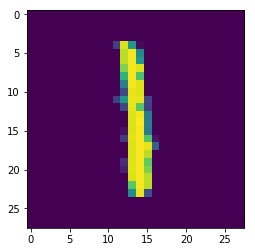

In [25]:
from matplotlib import pyplot as plt
import random
i = random.randint(1,60000)
plt.imshow(x_train[i])

In [32]:
x_train, x_test = x_train/255, x_test/255
x_train, x_test = x_train.reshape(x_train.shape[0], 28, 28, 1), x_test.reshape(x_test.shape[0],28,28,1)

y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

In [33]:
keep_prob = 0.25
model = keras.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(1-keep_prob))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(1-keep_prob))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#model.fit(x_train, y_train, 
          #batch_size=32, epochs=10, verbose=1)

#score = model.evaluate(x_test, y_test, verbose=0)


In [34]:
model.fit(x_train, y_train, batch_size= 32 ,epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 113s 2ms/sample - loss: 0.4468 - acc: 0.8593
Epoch 2/10
60000/60000 [==============================] - 117s 2ms/sample - loss: 0.2339 - acc: 0.9310
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.1955 - acc: 0.9420
Epoch 4/10
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.1707 - acc: 0.9490
Epoch 5/10
60000/60000 [==============================] - 116s 2ms/sample - loss: 0.1612 - acc: 0.9523
Epoch 6/10
60000/60000 [==============================] - 134s 2ms/sample - loss: 0.1512 - acc: 0.9561
Epoch 7/10
60000/60000 [==============================] - 139s 2ms/sample - loss: 0.1455 - acc: 0.9575
Epoch 8/10
60000/60000 [==============================] - 138s 2ms/sample - loss: 0.1400 - acc: 0.9592
Epoch 9/10
60000/60000 [==============================] - 145s 2ms/sample - loss: 0.1352 - acc: 0.9598
Epoch 10/10
60000/60000 [==============================] - 147s 2ms/sampl

In [36]:
score = model.evaluate(x_test, y_test, verbose=0)

In [37]:
score

[0.035197954082820435, 0.988]

From just 10 epochs, the model has a 98.8% accuracy. This can even be improved with optimising the model and increasing the epochs.